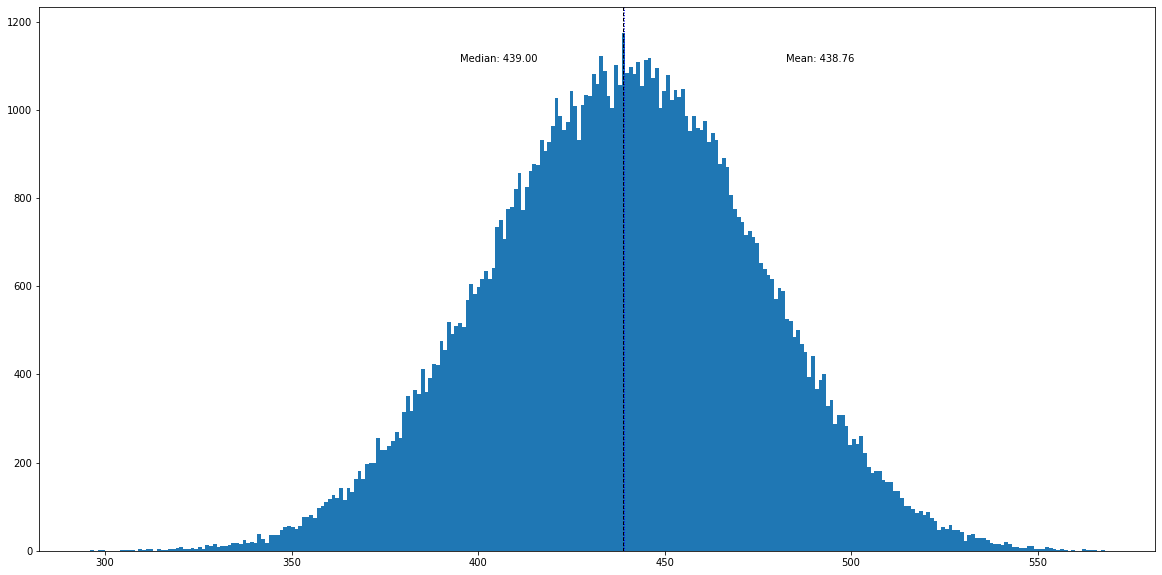

In [1]:
# Distribution of results
%matplotlib inline

import re
import numpy as np
import matplotlib.pyplot as plt

x = []
with open("uniform_200k/100k_protocols_results.csv", 'r') as f:
    for line in f:
        for i in range(len(line) // 3):
            x.append(100 * int(line[i * 3]) + 10 * int(line[i * 3 + 1]) + int(line[i * 3 + 2]))

x = np.asarray(x)
plt.figure(figsize=(20,10))
length = np.max(x) - np.min(x) + 1
plt.hist(x, length)

plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))


plt.axvline(np.median(x), color='b', linestyle='dotted', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.median(x)*0.9, max_ylim*0.9, 'Median: {:.2f}'.format(np.median(x)))
plt.savefig("distribution.png")
plt.show()

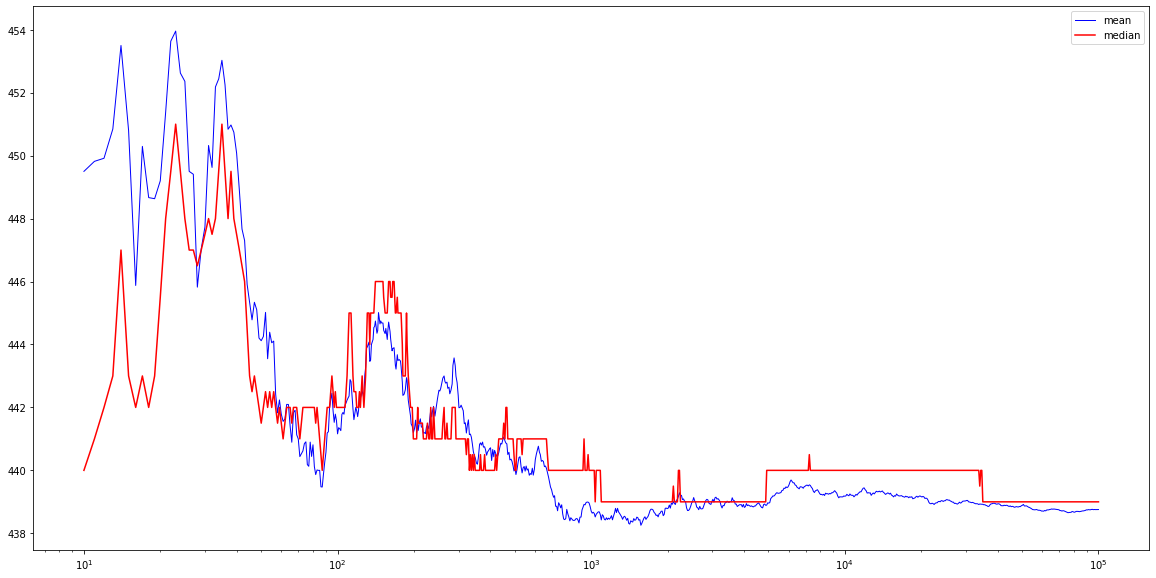

In [2]:
# Convergence to the mean
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = []
with open("uniform_200k/100k_protocols_results.csv", 'r') as f:
    for line in f:
        for i in range(len(line) // 3):
            x.append(100 * int(line[i * 3]) + 10 * int(line[i * 3 + 1]) + int(line[i * 3 + 2]))

# x = np.random.permutation(x)
ax = np.logspace(1, 5, 1001, dtype = int)

avg, median = [], []

for i in ax:
    avg.append(np.mean(x[0:i]))
    median.append(np.median(x[0:i]))
    
plt.figure(figsize=(20,10))
plt.plot(ax, avg, 'b', linewidth=1, label = "mean")
plt.plot(ax, median, 'r', label = "median")
plt.xscale('log')
plt.legend()
plt.savefig("convergence.png")
plt.show()
